In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
titanic = pd.read_csv('test.csv')

In [3]:
titanic.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
titanic.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [5]:
titanic.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [11]:
titanic['Age'].fillna(titanic['Age'].median())

0      34.5
1      47.0
2      62.0
3      27.0
4      22.0
       ... 
413    27.0
414    39.0
415    38.5
416    27.0
417    27.0
Name: Age, Length: 418, dtype: float64

In [12]:
titanic['Embarked'].fillna(titanic['Embarked'].mode()[0])

0      Q
1      S
2      Q
3      S
4      S
      ..
413    S
414    C
415    S
416    S
417    C
Name: Embarked, Length: 418, dtype: object

In [15]:
titanic['Fare'].fillna(titanic['Fare'].mean())

0        7.8292
1        7.0000
2        9.6875
3        8.6625
4       12.2875
         ...   
413      8.0500
414    108.9000
415      7.2500
416      8.0500
417     22.3583
Name: Fare, Length: 418, dtype: float64

In [23]:
#ek baar run karna varna error ayega
titanic.drop('Cabin',axis=1)

KeyError: "['Cabin'] not found in axis"

In [24]:
titanic.dropna(subset=['Embarked'])

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S
...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,S


In [25]:
titanic.isnull().sum()

PassengerId     0
Pclass          0
Name            0
Sex             0
Age            86
SibSp           0
Parch           0
Ticket          0
Fare            1
Embarked        0
dtype: int64

In [26]:
titanic['Sex'] = titanic['Sex'].map({'female':0,'male':1})

In [27]:
#convert embarked into numerical using one-hot encoding
titanic = pd.get_dummies(titanic,columns=['Embarked'],prefix='Embarked')

In [28]:
titanic.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked_C,Embarked_Q,Embarked_S
0,892,3,"Kelly, Mr. James",1,34.5,0,0,330911,7.8292,False,True,False
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,363272,7.0000,False,False,True
2,894,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,240276,9.6875,False,True,False
3,895,3,"Wirz, Mr. Albert",1,27.0,0,0,315154,8.6625,False,False,True
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,3101298,12.2875,False,False,True


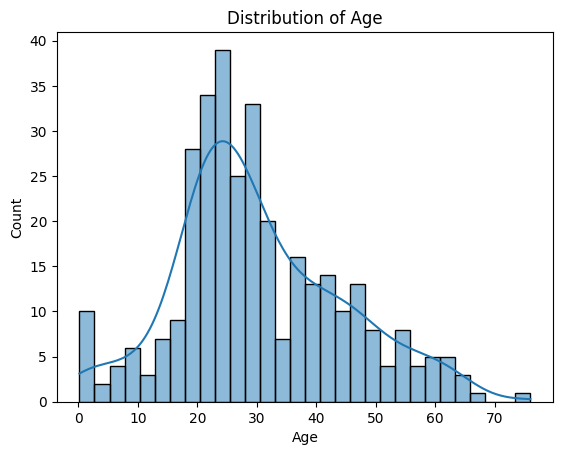

In [30]:
plt.Figure(figsize=(8,6))
sns.histplot(titanic['Age'].dropna(),bins=30,kde=True)
plt.title('Distribution of Age')
plt.show()
#Age Histogram

<Axes: xlabel='SibSp', ylabel='count'>

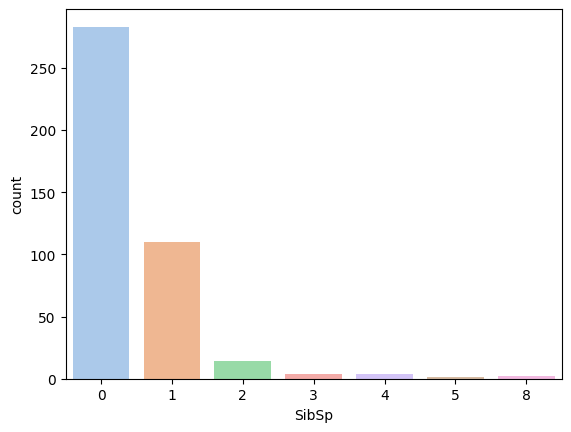

In [33]:
plt.Figure(figsize=(6,4))
sns.countplot(x='SibSp',data=titanic,palette='pastel')
#Countplot for survival

<Axes: xlabel='Pclass', ylabel='SibSp'>

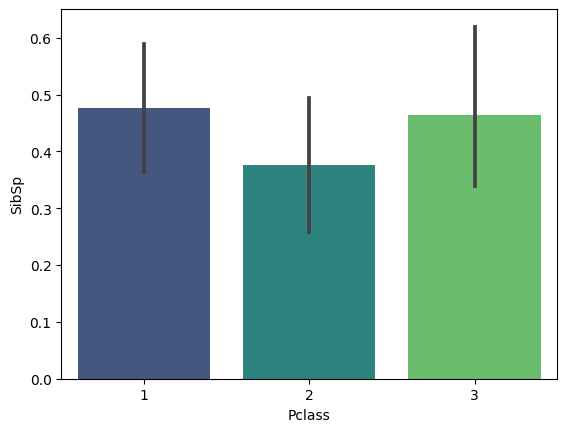

In [34]:
plt.Figure(figsize=(8,6))
sns.barplot(x='Pclass',y='SibSp',data=titanic,palette='viridis')
#Survival rate by Pclass

<Axes: xlabel='Sex', ylabel='SibSp'>

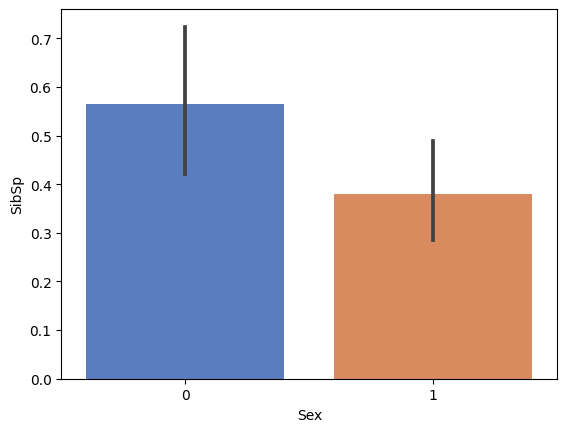

In [35]:
#survival rate by sex 
plt.Figure(figsize=(8,6))
sns.barplot(x='Sex',y='SibSp',data=titanic,palette='muted')

In [36]:
#heatmap for correlation matrix
titanic.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Embarked_C', 'Embarked_Q', 'Embarked_S'],
      dtype='object')

<Axes: >

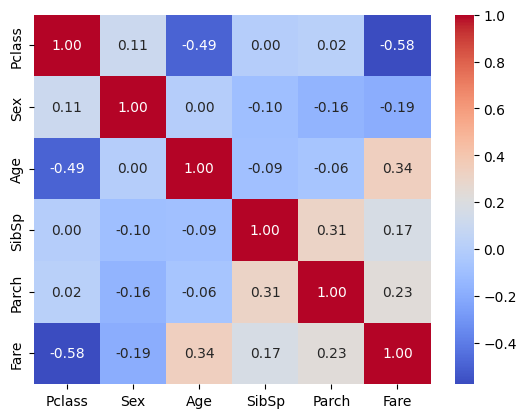

In [40]:
numerical_columms = ['Pclass','Sex','Age','SibSp','Parch','Fare']
correlation_matrix = titanic[numerical_columms].corr()

#plotting the heatmap for correlation matrix
plt.Figure(figsize=(10,8))
sns.heatmap(correlation_matrix,annot=True,cmap='coolwarm',fmt=".2f")